In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

/home/gaojing/anaconda3/envs/paddlepaddle-gpu-2.1.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
iris = load_iris()

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [5]:
df['label'] = iris.target

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

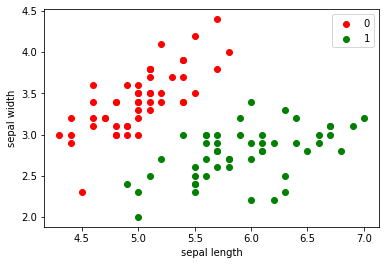

In [11]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], c='red', label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], c='green', label="1")
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()      

In [13]:
data = np.array(df.iloc[:100, [0, 1, -1]])
data.shape

(100, 3)

In [14]:
X, y = data[:,:-1], data[:,-1]

In [15]:
y = np.array([1 if i == 1 else -1 for i in y])

In [16]:
X.shape

(100, 2)

In [17]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [18]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [19]:
def initilize_with_zeros(dim):
    w = np.zeros(dim)
    b = 0.0
    return w,b

def sign(x,w,b):
    return np.dot(x,w)+b


In [23]:
def train(X_train,y_train,learning_rate):
    w,b = initilize_with_zeros(X_train.shape[1])
    is_wrong = False
    while not is_wrong:
        wrong_count = 0
        for i in range(len(X_train)):
            x = X_train[i]
            y = y_train[i]
            
            if y* sign(x,w,b) <=0:
                w = w + learning_rate*np.dot(y,x)
                b = b + learning_rate*y
                wrong_count +=1
        if wrong_count ==0:
            is_wrong = True
            print("没有分割点")
        params = {
            "w":w,
            "b":b
            }
    return params

In [24]:
params = train(X,y,0.01)

没有分割点


In [25]:
params


{'w': array([ 0.79 , -1.007]), 'b': -1.2400000000000009}

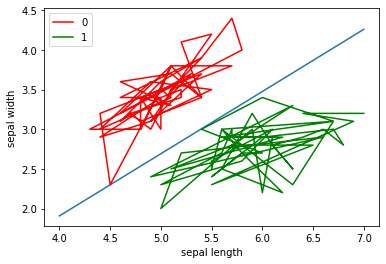

In [27]:
x_points = np.linspace(4, 7, 10)
y_hat = -(params['w'][0]*x_points + params['b'])/params['w'][1]
plt.plot(x_points, y_hat)
plt.plot(data[:50, 0], data[:50, 1], color='red', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], color='green', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()